In [5]:
### Library Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf 


In [6]:
### Load in Stock Data
tickers = ['AAPL', 'GOOG']
start_date = '2024-01-01'

def import_stock_data(tickers, start_date):
    data = pd.DataFrame()
    if len([tickers]) == 1:
        data[tickers] = yf.download(tickers, start_date)['Adj Close']
        data = pd.DataFrame(data)
    else:
        for t in tickers:
            data[t] = yf.download(tickers, start_date)['Adj Close']
    # Reset index to make headings in the same row
    data.reset_index(inplace = True)

    data['Date'] = pd.to_datetime(data['Date'])

    return data

stock_data = import_stock_data(tickers, start_date)
stock_data

[*********************100%%**********************]  2 of 2 completed


,Date,AAPL,GOOG
0,2024-01-02,185.403412,139.559998
1,2024-01-03,184.015198,140.360001
2,2024-01-04,181.678177,138.039993
3,2024-01-05,180.949097,137.389999
4,2024-01-08,185.323517,140.529999
...,...,...,...
72,2024-04-16,169.380005,156.000000
73,2024-04-17,168.000000,156.880005
74,2024-04-18,167.039993,157.460007
75,2024-04-19,165.000000,155.720001


In [7]:
### Compute RSI for Multiple Tickers 
def calculate_rsi(data, periods, tickers):
    rsi_df = pd.DataFrame(index = data.index)
    rsi_vals = {}

    for t in tickers:
        # Calculate price changes for each ticker
        data[f'{t}_Price Change'] = data[t].diff()
        # Separate gains and losses
        data[f'{t}_Gain'] = data[f'{t}_Price Change'].apply(lambda x: x if x > 0 else 0)
        data[f'{t}_Loss'] = data[f'{t}_Price Change'].apply(lambda x: abs(x) if x < 0 else 0)
        # Calculate average gains and losses over the period
        data[f'{t}_Avg Gain'] = data[f'{t}_Gain'].rolling(window = periods).mean()
        data[f'{t}_Avg Loss'] = data[f'{t}_Loss'].rolling(window = periods).mean()
        # Calculate RS (Relative Strength)
        data[f'{t}_RS'] = data[f'{t}_Avg Gain'] / data[f'{t}_Avg Loss']
        # Calculate RSI using the formula: RSI = 100 - (100 / (1 + RS))
        data[f'{t}_RSI'] = 100 - (100 / (1 + data[f'{t}_RS']))
        # Append RSI column to the DataFrame
        rsi_df[f'RSI_{t}'] = data[f'{t}_RSI']
        # Append last RSI value to rsi_vals dictionary
        rsi_vals[t] = data[f'{t}_RSI'].iloc[-1]

    return rsi_df, rsi_vals

# Call the function to calculate RSI for multiple tickers
rsi_df, rsi_vals = calculate_rsi(stock_data, periods = 14, tickers = tickers)
print(rsi_df.tail(5))
print("RSI values list: ", rsi_vals)

     RSI_AAPL   RSI_GOOG
72  49.461661  58.613796
73  40.661275  59.648451
74  41.944842  60.054167
75  41.065720  48.330481
76  44.604314  54.166674
RSI values list:  {'AAPL': 44.60431417750699, 'GOOG': 54.16667430829508}


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


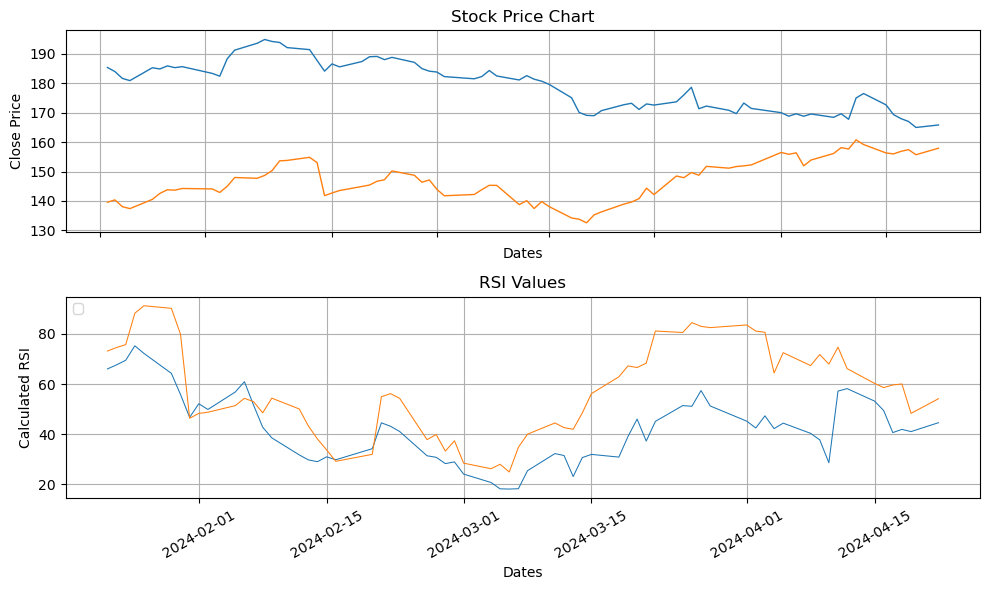

In [8]:
### Plot RSI and Stock DataFrames
# Plot Stocks Analyzed
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(2, 1, 1)
ax.set_xticklabels([])

for t in tickers:
    plt.plot(stock_data['Date'], stock_data[t], lw = 1, label = t)

plt.title('Stock Price Chart')
plt.ylabel('Close Price')
plt.xlabel('Dates')
plt.grid(True)

# Add CCI Subplot
bx = fig.add_subplot(2, 1, 2)

for t in tickers:
    plt.plot(stock_data['Date'], rsi_df[f'RSI_{t}'], lw = 0.75)

plt.title('RSI Values')
plt.legend(loc = 2, prop = {'size': 9.5})
plt.ylabel('Calculated RSI')
plt.xlabel('Dates')
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation = 30)
plt.tight_layout()
plt.show()